In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bri-data-hackathon-cr-optimization/sample_submission.csv
/kaggle/input/bri-data-hackathon-cr-optimization/data_description.csv
/kaggle/input/bri-data-hackathon-cr-optimization/train.csv
/kaggle/input/bri-data-hackathon-cr-optimization/test.csv


In [2]:
# installing package for interactive chart
!pip install ipywidgets --upgrade
!pip install plotly --upgrade

     |████████████████████████████████| 121 kB 1.2 MB/s 
     |████████████████████████████████| 243 kB 4.0 MB/s 
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.5.1
    Uninstalling ipywidgets-7.5.1:
      Successfully uninstalled ipywidgets-7.5.1
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
     |████████████████████████████████| 13.2 MB 9.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.14.0
    Uninstalling plotly-4.14.0:
      Successfully uninstalled plotly-4.14.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
# Go to dataset directory
%cd ../input/bri-data-hackathon-cr-optimization

/kaggle/input/bri-data-hackathon-cr-optimization


In [4]:
ls

data_description.csv  sample_submission.csv  test.csv  train.csv


In [5]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read dataset, change the datatype of periode column to datetime, and make periode as index of the dataframe
df = pd.read_csv('train.csv', index_col=[0], parse_dates=[0])
df

,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
periode,,,,,,,,,,,,
2019-07-31,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
2019-08-01,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2019-08-02,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
2019-08-03,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
2019-08-04,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,4.692000e+08,-2.264000e+08,0.000000e+00,0.000000e+00,3.0,6.770562e+11,7.984164e+11,1.234267e+10,7.260305e+11,2.978684e+11,1.123736e+13,5.085800e+09
2020-09-27,5.272500e+08,-6.187500e+08,6.466720e+10,-7.829833e+10,3.0,8.005756e+11,7.979421e+11,1.226298e+10,7.243814e+11,2.978684e+11,1.122373e+13,4.994300e+09
2020-09-28,7.438000e+08,-5.562000e+08,1.264345e+11,-8.203374e+10,3.0,1.531154e+12,7.961238e+11,1.521195e+10,7.234264e+11,2.978684e+11,1.126813e+13,5.181900e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 425 entries, 2019-07-31 to 2020-09-30
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cash_in_echannel            425 non-null    float64
 1   cash_out_echannel           425 non-null    float64
 2   cash_in_kantor              425 non-null    float64
 3   cash_out_kantor             425 non-null    float64
 4   cr_ketetapan_total_bkn_sum  425 non-null    float64
 5   giro                        425 non-null    float64
 6   deposito                    425 non-null    float64
 7   kewajiban_lain              425 non-null    float64
 8   tabungan                    425 non-null    float64
 9   rata_dpk_mingguan           425 non-null    float64
 10  kas_kantor                  425 non-null    float64
 11  kas_echannel                425 non-null    float64
dtypes: float64(12)
memory usage: 43.2 KB


In [8]:
# remove constant variable
df.drop(['cr_ketetapan_total_bkn_sum'], axis=1, inplace=True)

### Exploratory Data Analysis

In [9]:
# plot time series and the corresponding distribution
def plot_all(df):
    cols = df.columns
    fig, ax = plt.subplots(len(cols), 2, figsize=(18,len(cols)*3), gridspec_kw={'width_ratios': [1, 3]})
    colors = sns.color_palette()
    colors += colors
    ylims = [1.8e-9, 1.8e-9, 1.2e-11, 1.4e-11, 1.75e-12, 7e-12, 2.3e-10, 1.3e-11, 1.3e-11, 1.1e-13, 6.5e-10]
    for i, (col, ylim) in enumerate(zip(cols, ylims)):
        sns.distplot(df[col], ax=ax[i,0], color=colors[i])
        ax[i,1].plot(df.index, df[col], color=colors[i])
        ax[i,1].set_title(col)
        ax[i,1].grid()
        ax[i,0].set_ylim(0,ylim)
    plt.tight_layout()

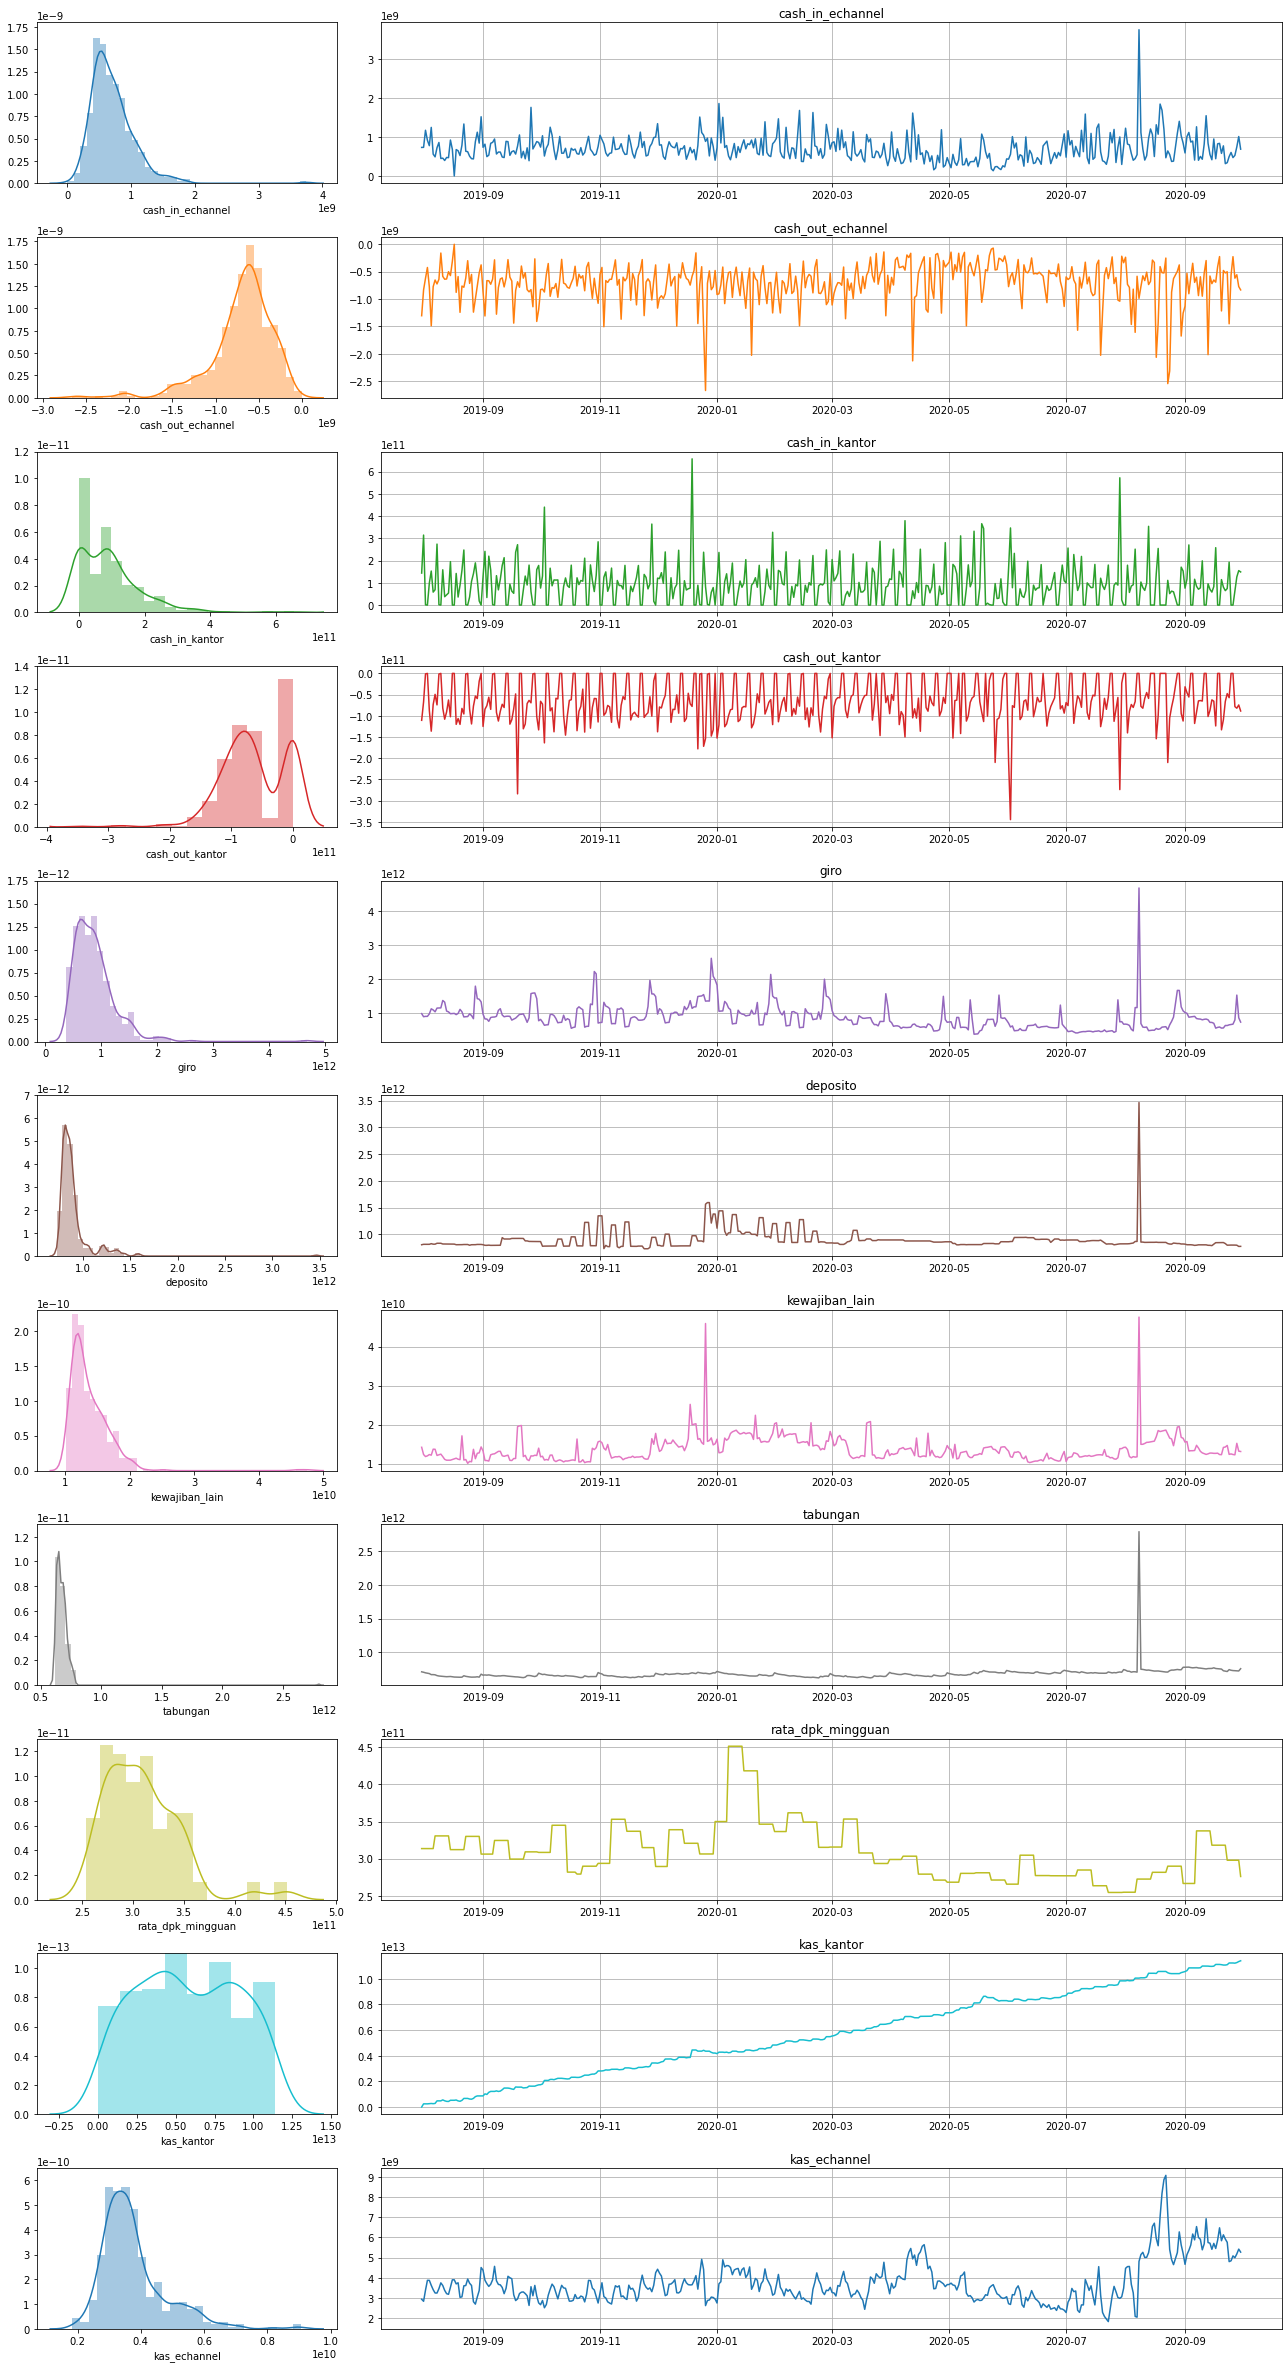

In [10]:
plot_all(df)

In [11]:
def plot_target(column):
    # approx_cashflow actually is a formula that given by description overview section (kaggle)
    approx_cashflow = df[f'cash_in_{column}'] + df[f'cash_out_{column}'] + df[f'kas_{column}'].shift(1)
    cashflow = df[f'cash_in_{column}'] + df[f'cash_out_{column}']

    fig, ax = plt.subplots(1, 2, figsize=(18,3))
    ax[0].plot(approx_cashflow, label='approx_cashflow')
    ax[0].plot(df[f'kas_{column}'], label=f'kas_{column}')
    ax[0].legend()
    ax[1].plot(cashflow, label='cashflow')
    ax[1].legend();

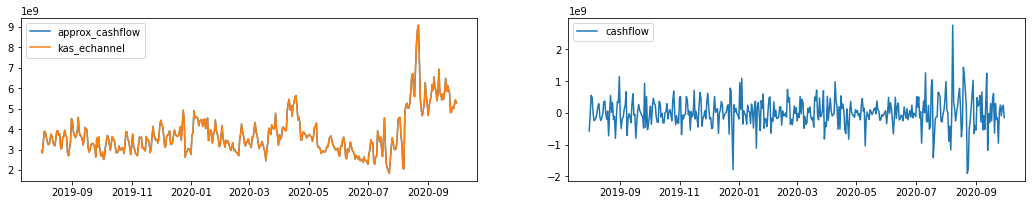

In [12]:
plot_target('echannel')

As we can see above that approx_cashflow and kas_echannel have same plot meaning that they have same value

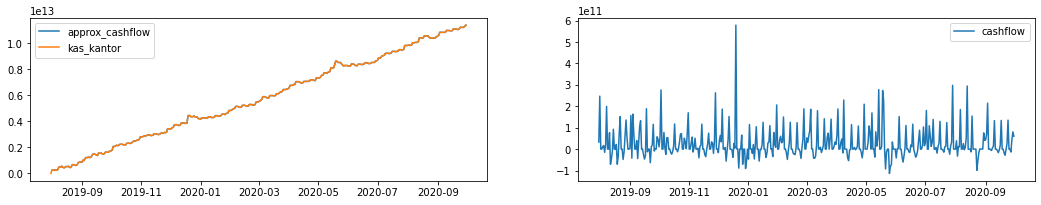

In [13]:
plot_target('kantor')

Like kas_echannel, kas_kantor has same value as approx_cashflow as well

In [14]:
# Correlation heatmap
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
cash_in_echannel,1.00,-0.21,-0.00,0.08,0.29,0.37,0.35,0.43,0.07,-0.02,0.25
cash_out_echannel,-0.21,1.00,-0.36,0.50,-0.13,-0.03,-0.21,-0.05,-0.08,0.04,0.04
cash_in_kantor,-0.00,-0.36,1.00,-0.65,-0.03,-0.09,-0.03,-0.03,-0.05,-0.03,-0.16
cash_out_kantor,0.08,0.50,-0.65,1.00,-0.05,0.15,0.01,0.06,-0.02,0.06,0.13
giro,0.29,-0.13,-0.03,-0.05,1.00,0.34,0.44,0.38,0.21,-0.34,-0.05
deposito,0.37,-0.03,-0.09,0.15,0.34,1.00,0.53,0.59,0.24,-0.05,-0.06
kewajiban_lain,0.35,-0.21,-0.03,0.01,0.44,0.53,1.00,0.48,0.23,0.08,0.21
tabungan,0.43,-0.05,-0.03,0.06,0.38,0.59,0.48,1.00,-0.16,0.31,0.19
rata_dpk_mingguan,0.07,-0.08,-0.05,-0.02,0.21,0.24,0.23,-0.16,1.00,-0.43,0.04
kas_kantor,-0.02,0.04,-0.03,0.06,-0.34,-0.05,0.08,0.31,-0.43,1.00,0.39


We can say there is no highly correlated variables or strong correlation between target variables and any features. So, here we don't need to remove anything

### Data Cleaning

In [15]:
# Checking for missing value (date)
start = df.index[0]
end = df.index[-1]
ll = pd.date_range(start, end).tolist()
missing = [(i,j) for i,j in enumerate(ll) if j not in df.index]
missing

[(325, Timestamp('2020-06-20 00:00:00', freq='D')),
 (329, Timestamp('2020-06-24 00:00:00', freq='D')),
 (393, Timestamp('2020-08-27 00:00:00', freq='D'))]

In [16]:
# impute missing dates with middle values
for d in missing:
    # get middle value between 2 data
    tmp = (df.iloc[d[0]] + df.iloc[d[0]-1]) / 2
    # give timestamp for the index
    tmp.name = d[1]
    # append new data into the dataframe
    df = df.append(tmp)
df.sort_index(inplace=True)

In [17]:
# function to get rid of outliers
def replace_outliers(df, cols, std_thres):
    new_df = df.copy()
    for col in cols:
        global_std = new_df[col].std()
        global_med = new_df[col].median()
        # thresholds
        thres_up = global_med + std_thres*global_std
        thres_dw = global_med - std_thres*global_std
        # get middle values (y(t-1) + y(t+1)) / 2
        new_df['mid'] = (new_df[col].shift(-1) + new_df[col].shift(1)) / 2
        new_df['mid'][0] = new_df['mid'][1]
        new_df['mid'][-1] = new_df['mid'][-2]
        # replace outliers with middle values
        new_df[col] = np.where(new_df[col] > thres_up, new_df['mid'], new_df[col])
        new_df[col] = np.where(new_df[col] < thres_dw, new_df['mid'], new_df[col])
    return new_df.drop(['mid'], axis=1)

In [18]:
# clean outliers from these columns
cols = ['cash_out_kantor', 'kewajiban_lain', 'tabungan', 'cash_in_echannel', 'cash_in_kantor']
new_df = replace_outliers(df, cols, std_thres=8)

### Modelling using prophet

In [19]:
new_df['date'] = new_df.index

In [20]:
new_kas_kantor = new_df[['date', 'kas_kantor']].rename(
    columns={'date': 'ds',
             'kas_kantor': 'y'})

new_kas_kantor.head()

,ds,y
periode,,
2019-07-31,2019-07-31,1.928940e+09
2019-08-01,2019-08-01,2.492322e+11
2019-08-02,2019-08-02,2.493411e+11
2019-08-03,2019-08-03,2.493411e+11
2019-08-04,2019-08-04,2.608817e+11


In [21]:
new_kas_echannel = new_df[['date', 'kas_echannel']].rename(
    columns={'date': 'ds',
             'kas_echannel': 'y'})

new_kas_echannel.head()

,ds,y
periode,,
2019-07-31,2019-07-31,2.939100e+09
2019-08-01,2019-08-01,2.839150e+09
2019-08-02,2019-08-02,3.387550e+09
2019-08-03,2019-08-03,3.876950e+09
2019-08-04,2019-08-04,3.874250e+09


In [22]:
# fitting model using prophet
from fbprophet import Prophet
model_kas_kantor = Prophet()
model_kas_echannel = Prophet()
model_kas_kantor.fit(new_kas_kantor)
model_kas_echannel.fit(new_kas_echannel)

In [23]:
# making date for 31 days ahead
future_kas_kantor = model_kas_kantor.make_future_dataframe(periods=31, freq='D')
future_kas_kantor.tail()

,ds
454,2020-10-27
455,2020-10-28
456,2020-10-29
457,2020-10-30
458,2020-10-31


In [24]:
future_kas_echannel = model_kas_echannel.make_future_dataframe(periods=31, freq='D')
future_kas_echannel.tail()

,ds
454,2020-10-27
455,2020-10-28
456,2020-10-29
457,2020-10-30
458,2020-10-31


In [25]:
# perform a forecasting
forecast_kas_kantor = model_kas_kantor.predict(future_kas_kantor)
forecast_kas_kantor[['ds', 'trend', 'weekly', 'yhat']]

,ds,trend,weekly,yhat
0,2019-07-31,9.395869e+10,-3.138825e+10,6.257043e+10
1,2019-08-01,1.220725e+11,7.000912e+10,1.920816e+11
2,2019-08-02,1.501863e+11,4.264800e+10,1.928343e+11
3,2019-08-03,1.783002e+11,1.548768e+10,1.937878e+11
4,2019-08-04,2.064140e+11,-1.151563e+10,1.948983e+11
...,...,...,...,...
454,2020-10-27,1.227353e+13,-5.084354e+10,1.222269e+13
455,2020-10-28,1.230241e+13,-3.138825e+10,1.227102e+13
456,2020-10-29,1.233129e+13,7.000912e+10,1.240130e+13
457,2020-10-30,1.236017e+13,4.264800e+10,1.240282e+13


In [26]:
forecast_kas_echannel = model_kas_echannel.predict(future_kas_echannel)
forecast_kas_echannel[['ds', 'trend', 'weekly', 'yhat']]

,ds,trend,weekly,yhat
0,2019-07-31,3.382999e+09,-2.245028e+08,3.158496e+09
1,2019-08-01,3.384218e+09,-2.243874e+08,3.159831e+09
2,2019-08-02,3.385437e+09,-2.974340e+07,3.355694e+09
3,2019-08-03,3.386657e+09,4.275004e+08,3.814157e+09
4,2019-08-04,3.387876e+09,1.828410e+08,3.570717e+09
...,...,...,...,...
454,2020-10-27,7.078022e+09,-1.577726e+08,6.920249e+09
455,2020-10-28,7.110818e+09,-2.245028e+08,6.886315e+09
456,2020-10-29,7.143614e+09,-2.243874e+08,6.919227e+09
457,2020-10-30,7.176411e+09,-2.974340e+07,7.146667e+09


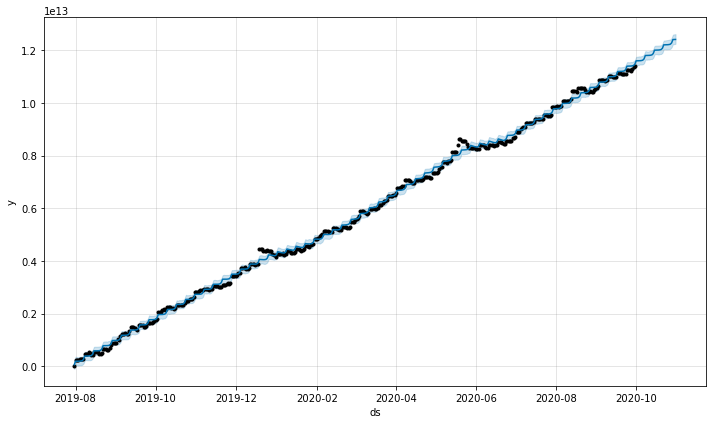

In [27]:
# visualize forecasting
fig = model_kas_kantor.plot(forecast_kas_kantor)

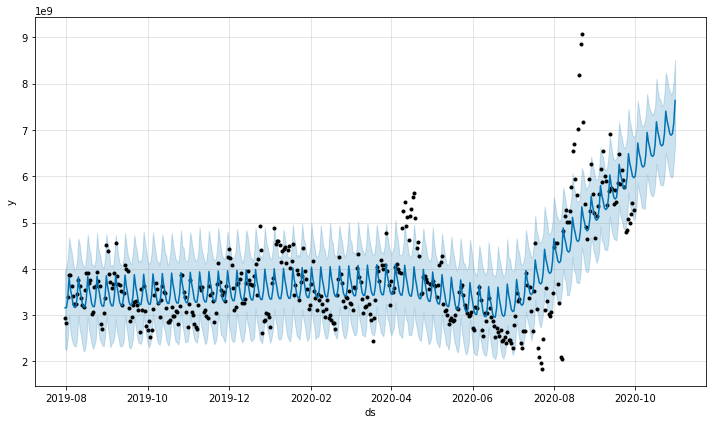

In [28]:
fig = model_kas_echannel.plot(forecast_kas_echannel)

* The black points are actual time series and the blue one are fitted time series

Here, we use General Additive Model (GAM) to describing a time series and perform a forecasting.
The yhat (target value) is simply :

$yhat(t) = T(t) + S_{weekly}(t) + S_{yearly}(t)$
- Trend ($T$): Long term movement in its mean
- Seasonality ($S$): Repeated seasonal effects
- Residuals ($E$): Irregular components or random fluctuations not described by trend and seasonality

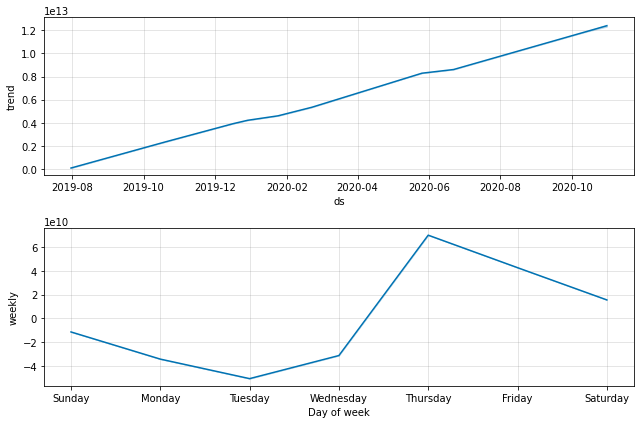

In [29]:
# visualize each of the trend and seasonality components (kas kantor)
fig = model_kas_kantor.plot_components(forecast_kas_kantor)

From the plots above we get some insight that the kas kantor trend is uptrend which are the values increased over time. And from weekly component, we know that from friday to tuesday the kas kantor will be decreased but after that going up on wednesday, significantly on thursday

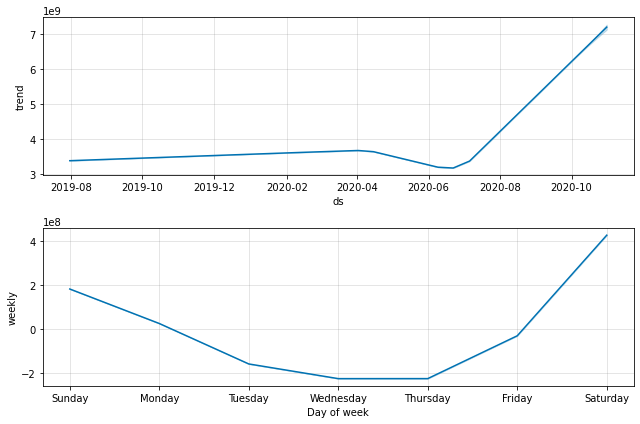

In [30]:
# visualize each of the trend and seasonality components (kas echannel)
fig = model_kas_echannel.plot_components(forecast_kas_echannel)

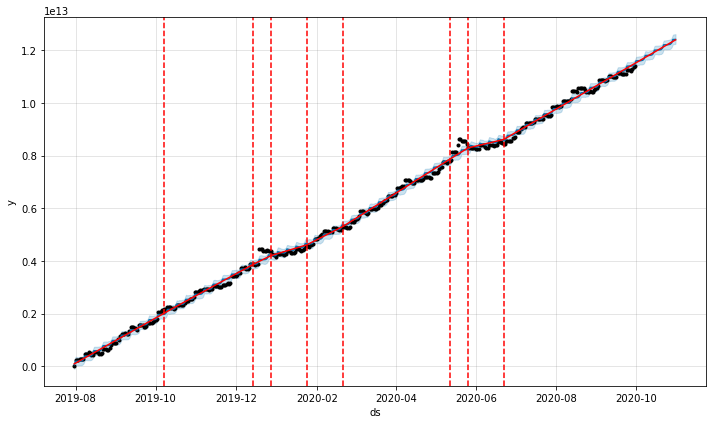

In [31]:
# visualize detected significant changepoints
from fbprophet.plot import add_changepoints_to_plot
fig = model_kas_kantor.plot(forecast_kas_kantor)
a = add_changepoints_to_plot(fig.gca(), model_kas_kantor, forecast_kas_kantor)

Well, this one really looks good, we don't have to adjusting the parameters anymore

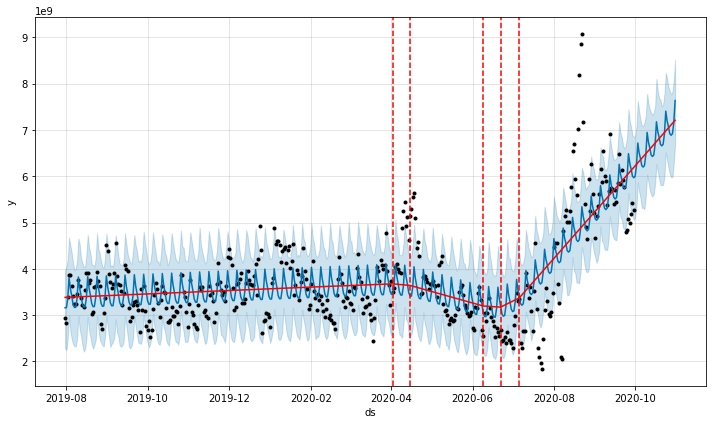

In [32]:
fig = model_kas_echannel.plot(forecast_kas_echannel)
a = add_changepoints_to_plot(fig.gca(), model_kas_echannel, forecast_kas_echannel)

Hmmm, it looks really bad. The line doesn't fit the actual values very well.  Thus, let's adjusting trend flexibility

### Adjusting Trend Flexibility

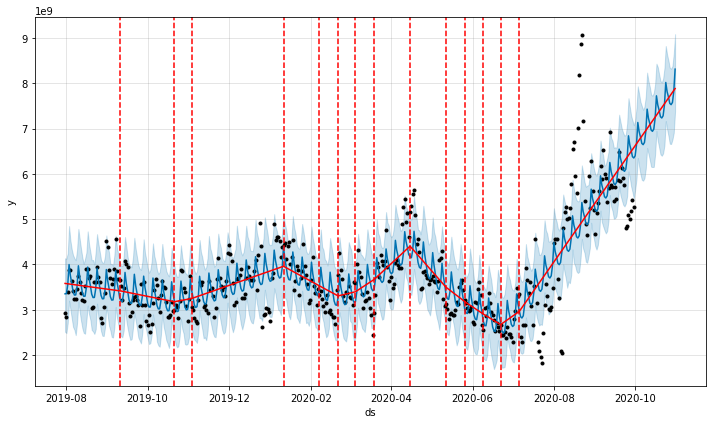

In [33]:
# fitting model
model_tuning_trend = Prophet(
    n_changepoints=25, # default = 25
    changepoint_range=0.8, # default = 0.8
    changepoint_prior_scale=0.5 # default = 0.05
    )
model_tuning_trend.fit(new_kas_echannel)

# forecasting
future = model_tuning_trend.make_future_dataframe(periods=31, freq='D')
forecast = model_tuning_trend.predict(future)

# visualize
fig = model_tuning_trend.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast)

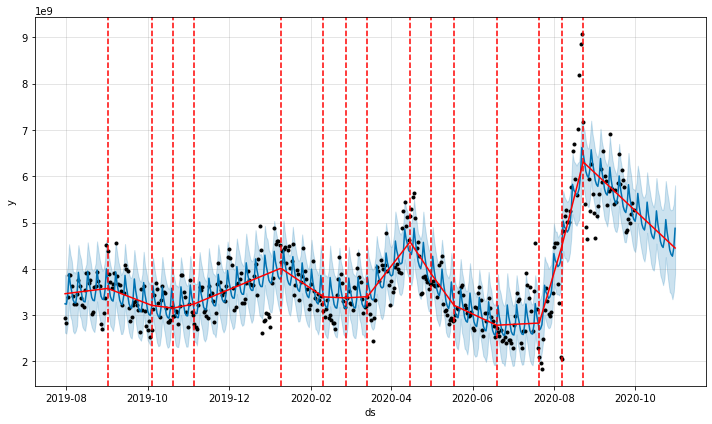

In [34]:
# fitting model
model_tuning_trend = Prophet(
    n_changepoints=25, # default = 25
    changepoint_range=0.95, # default = 0.8
    changepoint_prior_scale=0.5 # default = 0.05
    )
model_tuning_trend.fit(new_kas_echannel)

# forecasting
future = model_tuning_trend.make_future_dataframe(periods=31, freq='D')
forecast = model_tuning_trend.predict(future)

# visualize
fig = model_tuning_trend.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast)

Well, just trying to make the model more flexible here and we can see a huge different between the first one and the second one. The first one predicted the next month value will be incresed but the second one doing the opposite. Interesting :)

### Adjusting Fourier Order

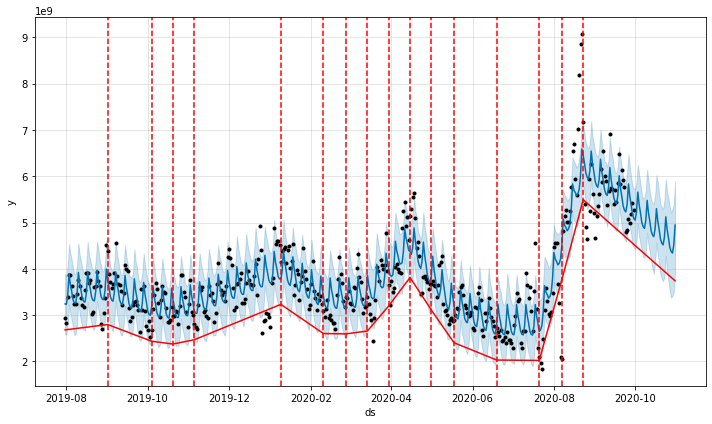

In [35]:
# fitting model
model_tuning_trend = Prophet(
    n_changepoints=25, # default = 25
    changepoint_range=0.95, # default = 0.8
    changepoint_prior_scale=0.5, # default = 0.05
    weekly_seasonality=200 # default = 3
    )
model_tuning_trend.fit(new_kas_echannel)

# forecasting
future = model_tuning_trend.make_future_dataframe(periods=31, freq='D')
forecast = model_tuning_trend.predict(future)

# visualize
fig = model_tuning_trend.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast)

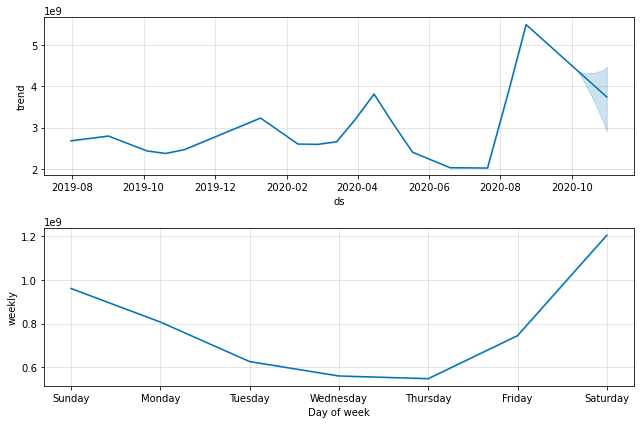

In [36]:
# visualize
fig = model_tuning_trend.plot_components(forecast)

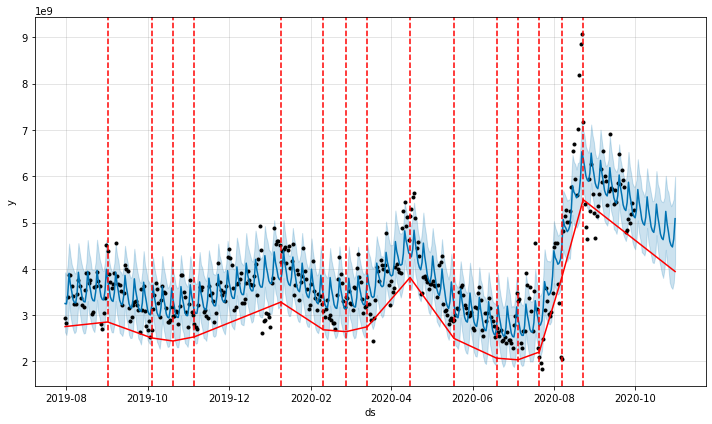

In [37]:
# fitting model
model_tuning_trend = Prophet(
    n_changepoints=25, # default = 25
    changepoint_range=0.95, # default = 0.8
    changepoint_prior_scale=0.5, # default = 0.05
    weekly_seasonality=400 # default = 3
    )
model_tuning_trend.fit(new_kas_echannel)

# forecasting
future = model_tuning_trend.make_future_dataframe(periods=31, freq='D')
forecast = model_tuning_trend.predict(future)

# visualize
fig = model_tuning_trend.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast)

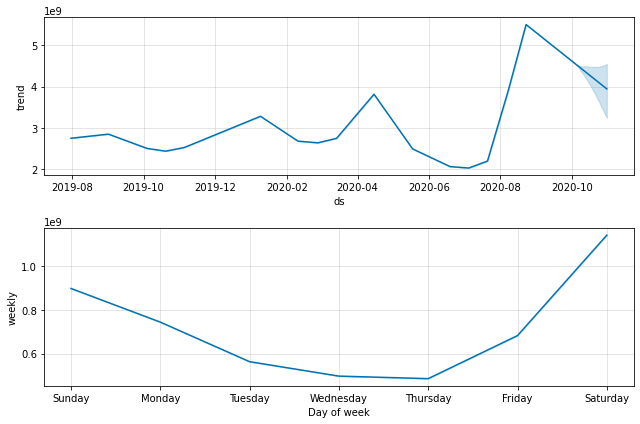

In [38]:
# visualize
fig = model_tuning_trend.plot_components(forecast)

### Customising Seasonalities

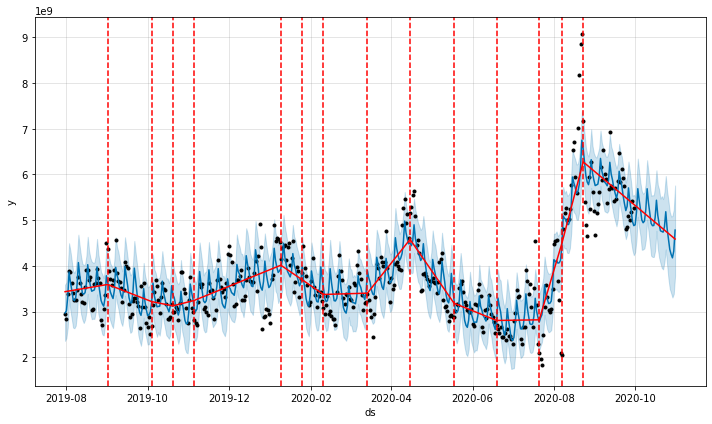

In [39]:
# fitting model
model_tuning_trend = Prophet(
    n_changepoints=25, # default = 25
    changepoint_range=0.95, # default = 0.8
    changepoint_prior_scale=0.5, # default = 0.05
    )

## add seasonality
model_tuning_trend.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_tuning_trend.fit(new_kas_echannel)

# forecasting
future = model_tuning_trend.make_future_dataframe(periods=31, freq='D')
forecast = model_tuning_trend.predict(future)

# visualize
fig = model_tuning_trend.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast)

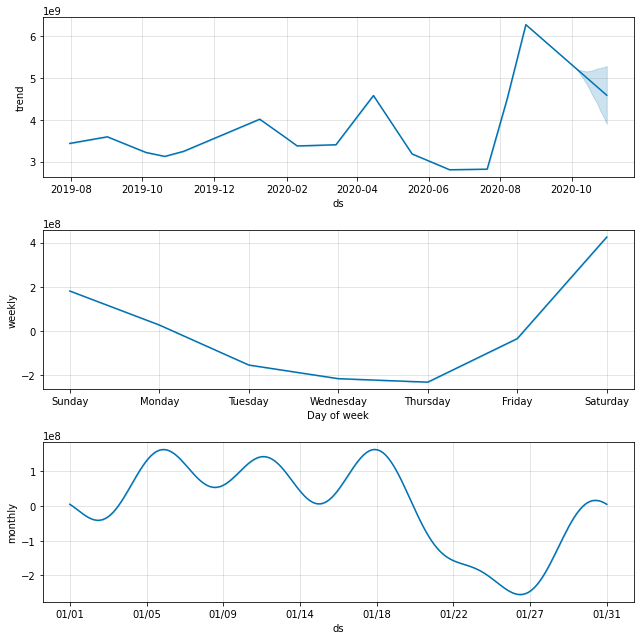

In [40]:
# visualize
fig = model_tuning_trend.plot_components(forecast)

Okay, i think this is the best model we have so far. It means, payday will be affected the values by adding monthly seasonality

### Interactive Visualisation

In [41]:
import plotly.io as pio
from fbprophet.plot import plot_plotly, plot_components_plotly
# pio.renderers.default = 'colab'

In [42]:
plot_plotly(model_tuning_trend, forecast)

In [43]:
plot_components_plotly(model_tuning_trend, forecast)

### Adding Holiday Effect

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019



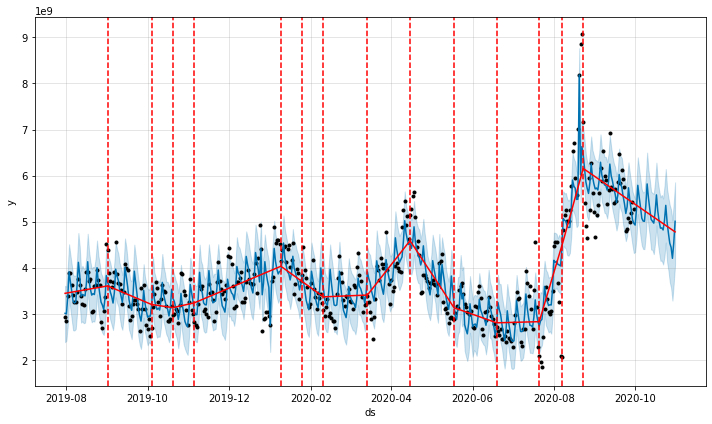

In [44]:
# fitting model
model_tuning_trend = Prophet(
    n_changepoints=25, # default = 25
    changepoint_range=0.95, # default = 0.8
    changepoint_prior_scale=0.5, # default = 0.05
    )

## add seasonality
model_tuning_trend.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_tuning_trend.add_country_holidays(country_name='ID')
model_tuning_trend.fit(new_kas_echannel)

# forecasting
future = model_tuning_trend.make_future_dataframe(periods=31, freq='D')
forecast = model_tuning_trend.predict(future)

# visualize
fig = model_tuning_trend.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast)

In [45]:
plot_plotly(model_tuning_trend, forecast)

### Now let's add regressor to our model

In [46]:
# function to convert dataframe that can be consumed by prophet
def convert_to_ds(col):
    temp = new_df[['date', col]].rename(
    columns={'date': 'ds',
             col: 'y'})
    return temp

In [47]:
new_cash_in_echannel = convert_to_ds('cash_in_echannel')
new_cash_in_kantor = convert_to_ds('cash_in_kantor')
new_cash_out_kantor = convert_to_ds('cash_out_kantor')
new_kewajiban_lain = convert_to_ds('kewajiban_lain')
new_tabungan = convert_to_ds('tabungan')

In [48]:
def fitting_model(data):
    # fitting model
    temp_model = Prophet(
    n_changepoints=25,
    changepoint_range=0.95,
    changepoint_prior_scale=0.5,
    )
    
    ## add monthly seasonality
    temp_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    temp_model.add_country_holidays(country_name='ID')
    temp_model.fit(data)
    
    # forecasting
    future_temp = temp_model.make_future_dataframe(periods=31, freq='D')
    forecast_temp = temp_model.predict(future_temp)
    
    return temp_model, future_temp, forecast_temp

In [49]:
model_cash_in_echannel, future_cash_in_echannel, forecast_cash_in_echannel = fitting_model(new_cash_in_echannel)
model_cash_in_kantor, future_cash_in_kantor, forecast_cash_in_kantor = fitting_model(new_cash_in_kantor)
model_cash_out_kantor, future_cash_out_kantor, forecast_cash_out_kantor = fitting_model(new_cash_out_kantor)
model_kewajiban_lain, future_kewajiban_lain, forecast_kewajiban_lain = fitting_model(new_kewajiban_lain)
model_tabungan, future_tabungan, forecast_tabungan = fitting_model(new_tabungan)

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7

In [50]:
plot_plotly(model_cash_in_echannel, forecast_cash_in_echannel)

I'm afraid to use this feature as one of regressor, since the the result isn't good

In [51]:
plot_plotly(model_cash_in_kantor, forecast_cash_in_kantor)

In [52]:
plot_plotly(model_cash_out_kantor, forecast_cash_out_kantor)

In [53]:
plot_plotly(model_kewajiban_lain, forecast_kewajiban_lain)

In [54]:
plot_plotly(model_tabungan, forecast_tabungan)

In [55]:
def create_regressor_frame(forecast, actual, name):
    forecasted_temp = forecast[['ds', 'yhat']].tail(31) \
                        .rename(columns={'yhat': name})
    
    actual_temp = actual.rename(columns={'y': name})
    
    feature_with_regressor = pd.concat([actual_temp, forecasted_temp])
    
    return feature_with_regressor

In [56]:
regressor_cash_in_echannel = create_regressor_frame(forecast_cash_in_echannel, new_cash_in_echannel, 'cash_in_echannel')
regressor_cash_in_kantor = create_regressor_frame(forecast_cash_in_kantor, new_cash_in_kantor, 'cash_in_kantor')
regressor_cash_out_kantor = create_regressor_frame(forecast_cash_out_kantor, new_cash_out_kantor, 'cash_out_kantor')
regressor_kewajiban_lain = create_regressor_frame(forecast_kewajiban_lain, new_kewajiban_lain, 'kewajiban_lain')
regressor_tabungan = create_regressor_frame(forecast_tabungan, new_tabungan, 'tabungan')
regressor_kas_kantor = create_regressor_frame(forecast_kas_kantor, new_kas_kantor, 'kas_kantor')

In [57]:
future_with_regressor = regressor_cash_in_echannel
future_with_regressor['cash_in_kantor'] = regressor_cash_in_kantor['cash_in_kantor']
future_with_regressor['cash_out_kantor'] = regressor_cash_out_kantor['cash_out_kantor']
future_with_regressor['kewajiban_lain'] = regressor_kewajiban_lain['kewajiban_lain']
future_with_regressor['tabungan'] = regressor_tabungan['tabungan']
future_with_regressor['kas_kantor'] = regressor_kas_kantor['kas_kantor']
future_with_regressor

,ds,cash_in_echannel,cash_in_kantor,cash_out_kantor,kewajiban_lain,tabungan,kas_kantor
2019-07-31 00:00:00,2019-07-31,7.303000e+08,1.436722e+11,-1.106104e+11,1.419685e+10,7.072647e+11,1.928940e+09
2019-08-01 00:00:00,2019-08-01,7.322000e+08,3.144131e+11,-6.710987e+10,1.234062e+10,7.011995e+11,2.492322e+11
2019-08-02 00:00:00,2019-08-02,1.169800e+09,1.251294e+09,-1.142332e+09,1.182022e+10,6.922787e+11,2.493411e+11
2019-08-03 00:00:00,2019-08-03,9.134500e+08,0.000000e+00,0.000000e+00,1.199640e+10,6.867224e+11,2.493411e+11
2019-08-04 00:00:00,2019-08-04,7.752500e+08,9.883331e+10,-8.729274e+10,1.232962e+10,6.813438e+11,2.608817e+11
...,...,...,...,...,...,...,...
454,2020-10-27,5.572942e+08,8.529353e+10,-7.984125e+10,8.341480e+09,6.701162e+11,1.222269e+13
455,2020-10-28,6.224663e+08,1.154300e+11,-6.178083e+10,9.140116e+09,6.707563e+11,1.227102e+13
456,2020-10-29,7.435254e+08,2.393296e+11,-7.843070e+10,9.526553e+09,6.797498e+11,1.240130e+13
457,2020-10-30,8.271478e+08,1.672398e+10,4.424885e+09,9.915039e+09,6.875786e+11,1.240282e+13


### Forecasting target variable with regressor

In [58]:
kas_echannel = new_df[['date', 'kas_echannel', 'cash_in_echannel', 'cash_in_kantor', 'cash_out_kantor', 'kewajiban_lain', 'tabungan', 'kas_kantor']].rename(
    columns={'date': 'ds',
             'kas_echannel': 'y'})

kas_echannel.head()

,ds,y,cash_in_echannel,cash_in_kantor,cash_out_kantor,kewajiban_lain,tabungan,kas_kantor
periode,,,,,,,,
2019-07-31,2019-07-31,2.939100e+09,7.303000e+08,1.436722e+11,-1.106104e+11,1.419685e+10,7.072647e+11,1.928940e+09
2019-08-01,2019-08-01,2.839150e+09,7.322000e+08,3.144131e+11,-6.710987e+10,1.234062e+10,7.011995e+11,2.492322e+11
2019-08-02,2019-08-02,3.387550e+09,1.169800e+09,1.251294e+09,-1.142332e+09,1.182022e+10,6.922787e+11,2.493411e+11
2019-08-03,2019-08-03,3.876950e+09,9.134500e+08,0.000000e+00,0.000000e+00,1.199640e+10,6.867224e+11,2.493411e+11
2019-08-04,2019-08-04,3.874250e+09,7.752500e+08,9.883331e+10,-8.729274e+10,1.232962e+10,6.813438e+11,2.608817e+11


/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019

/opt/conda/lib/python3.7/site-packages/fbprophet/hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019



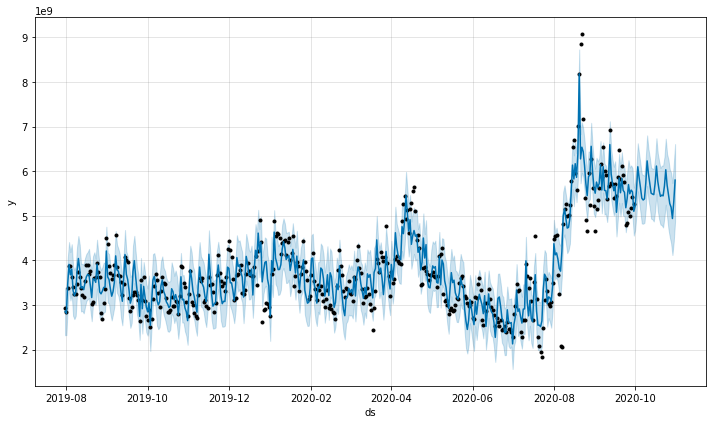

In [59]:
# fitting model
model_kas_echannel = Prophet(
    n_changepoints=25,
    changepoint_range=0.95,
    changepoint_prior_scale=0.5,
    )

## add monthly seasonality
model_kas_echannel.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_kas_echannel.add_country_holidays(country_name='ID')

## add regressor
model_kas_echannel.add_regressor('cash_in_echannel')
model_kas_echannel.add_regressor('cash_in_kantor')
model_kas_echannel.add_regressor('cash_out_kantor')
model_kas_echannel.add_regressor('kewajiban_lain') 
model_kas_echannel.add_regressor('tabungan')
model_kas_echannel.add_regressor('kas_kantor')
model_kas_echannel.fit(kas_echannel)

# forecasting
## use dataframe with regressor, instead of just `ds` column
forecast_kas_echannel = model_kas_echannel.predict(future_with_regressor)

# visualize
fig = model_kas_echannel.plot(forecast_kas_echannel)

### Export the values to csv

In [60]:
# take the last 31 days value for each target variables
days_31_kantor = forecast_kas_kantor[['yhat']].tail(31)
days_31_echannel = forecast_kas_echannel[['yhat']].tail(31)

frames = [days_31_kantor, days_31_echannel]

#concatenate dataframes
df = pd.concat(frames, sort=False)
df

,yhat
428,1.159265e+13
429,1.159417e+13
430,1.159589e+13
431,1.159777e+13
432,1.160377e+13
...,...
454,5.273481e+09
455,5.192199e+09
456,4.938929e+09
457,5.314245e+09


In [61]:
# create a new dataframe
nums = range(0,62)

temp_dict = {'index':list(nums), 
        'value':df['yhat']}

result = pd.DataFrame(temp_dict)
result

,index,value
428,0,1.159265e+13
429,1,1.159417e+13
430,2,1.159589e+13
431,3,1.159777e+13
432,4,1.160377e+13
...,...,...
454,57,5.273481e+09
455,58,5.192199e+09
456,59,4.938929e+09
457,60,5.314245e+09


In [62]:
# export to csv
result.to_csv('/kaggle/working/result_v3.csv', index=False)